In [1]:
import pandas as pd
import os
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt
import plotly.express as px
import re

In [2]:
df_data = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-turov/shared/homeworks/python_ds_miniprojects/final_project/data'

In [3]:
target_files = ['orders.csv', 'order_status.csv', 'products.csv']
data_files = []

for path, dirs, files in os.walk(df_data):
    for file in files:
        if file in target_files:
            file_path = os.path.join(path, file)
            data_files.append(file_path)

In [4]:
import pandas as pd
import os

# data_files - это список путей к файлам
orders_df_list = []
order_status_df_list = []
products_df_list = []

for file_path in data_files:
    try:
        df = pd.read_csv(file_path)

        if 'orders.csv' in file_path:
            manager = os.path.basename(os.path.dirname(file_path))
            date = os.path.basename(os.path.dirname(os.path.dirname(file_path)))
            df['manager'] = manager
            df['date'] = pd.to_datetime(date, format='%Y-%m-%d', errors='coerce')
            print(f"Добавляем данные для менеджера: {manager}, дата: {date}")
            orders_df_list.append(df)
        elif 'order_status.csv' in file_path:
            order_status_df_list.append(df)
        elif 'products.csv' in file_path:
            category = os.path.basename(os.path.dirname(file_path))
            df['category'] = category
            products_df_list.append(df)

    except FileNotFoundError:
        print(f"Файл не найден: {file_path}")
    except pd.errors.EmptyDataError:
        print(f"Пустой файл: {file_path}")
    except pd.errors.ParserError:
        print(f"Ошибка парсинга файла {file_path}. Проверьте формат CSV.")
    except Exception as e:
        print(f"Ошибка при обработке файла {file_path}: {e}")

# Проверка на наличие данных перед объединением
if orders_df_list:
    df_orders = pd.concat(orders_df_list, ignore_index=True)
else:
    print("Нет данных для объединения orders_df_list.")

if order_status_df_list:
    df_order_status = pd.concat(order_status_df_list, ignore_index=True)
else:
    print("Нет данных для объединения order_status_df_list.")

if products_df_list:
    df_products = pd.concat(products_df_list, ignore_index=True)
else:
    print("Нет данных для объединения products_df_list.")

Добавляем данные для менеджера: Владимир Ударников, дата: 2024-03-10
Добавляем данные для менеджера: Екатерина Тарелкина, дата: 2024-03-10
Добавляем данные для менеджера: Сергей Контрабасов, дата: 2024-03-10
Добавляем данные для менеджера: Владимир Ударников, дата: 2024-03-01
Добавляем данные для менеджера: Екатерина Тарелкина, дата: 2024-03-01
Добавляем данные для менеджера: Надежда Гармошкина, дата: 2024-03-01
Добавляем данные для менеджера: Сергей Контрабасов, дата: 2024-03-01
Добавляем данные для менеджера: Алексей Саксофонов, дата: 2024-03-01
Добавляем данные для менеджера: Аркадий Октавин, дата: 2024-03-01
Добавляем данные для менеджера: Виктор Тромбонов, дата: 2024-03-01
Добавляем данные для менеджера: Максим Барабанов, дата: 2024-03-01
Добавляем данные для менеджера: Маргарита Камертонова, дата: 2024-03-01
Добавляем данные для менеджера: Ксения Балалайкина, дата: 2024-03-01
Добавляем данные для менеджера: Владимир Ударников, дата: 2024-03-27
Добавляем данные для менеджера: Наде

Добавляем данные для менеджера: Екатерина Тарелкина, дата: 2024-03-15
Добавляем данные для менеджера: Антон Скрипкин, дата: 2024-03-15
Добавляем данные для менеджера: Анастасия Дудкина, дата: 2024-03-15
Добавляем данные для менеджера: Алексей Саксофонов, дата: 2024-03-15
Добавляем данные для менеджера: Максим Барабанов, дата: 2024-03-15
Добавляем данные для менеджера: Маргарита Камертонова, дата: 2024-03-15
Добавляем данные для менеджера: Ксения Балалайкина, дата: 2024-03-15
Добавляем данные для менеджера: Владимир Ударников, дата: 2024-03-11
Добавляем данные для менеджера: Екатерина Тарелкина, дата: 2024-03-11
Добавляем данные для менеджера: Надежда Гармошкина, дата: 2024-03-11
Добавляем данные для менеджера: Анастасия Дудкина, дата: 2024-03-11
Добавляем данные для менеджера: Алексей Саксофонов, дата: 2024-03-11
Добавляем данные для менеджера: Виктор Тромбонов, дата: 2024-03-11
Добавляем данные для менеджера: Маргарита Камертонова, дата: 2024-03-11
Добавляем данные для менеджера: Влад

In [5]:
df_orders.date[1202:2003]

1202   2024-03-06
1203   2024-03-06
1204   2024-03-06
1205   2024-03-06
1206   2024-03-06
          ...    
1998   2024-03-14
1999   2024-03-14
2000   2024-03-14
2001   2024-03-14
2002   2024-03-14
Name: date, Length: 801, dtype: datetime64[ns]

In [6]:
df_order_status.shape

(346, 3)

In [7]:
df_products.shape

(1677, 4)

In [8]:
df_orders.to_csv('df_orders.csv', index=False)

In [9]:
df_orders

,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10
...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26


In [10]:
df_order_status.to_csv('df_order_status.csv', index=False)

In [11]:
df_products.to_csv('df_products.csv', index=False)

### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

Посчитаем количество заказов в каждый день. Определим день с наибольшим числом заказов.

In [12]:
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_orders_4 = df_orders.groupby('date', as_index=False).agg(orders=('order_id', 'nunique'))
df_orders_sorted = df_orders_4.sort_values(by='orders', ascending=False)

# Получаем дату с максимальным числом заказов
top_date = df_orders_sorted.iloc[0]['date']

In [13]:
top_date

Timestamp('2024-03-14 00:00:00')

**Построим график с количеством заказов по дням и определим, заметна ли в данных сезонность.**

In [14]:
orders_by_date = df_orders.groupby('date')['order_id'].nunique().reset_index(name='order_count')
orders_by_date['day_of_week'] = orders_by_date['date'].dt.day_name()
orders_by_date = orders_by_date.sort_values('date')

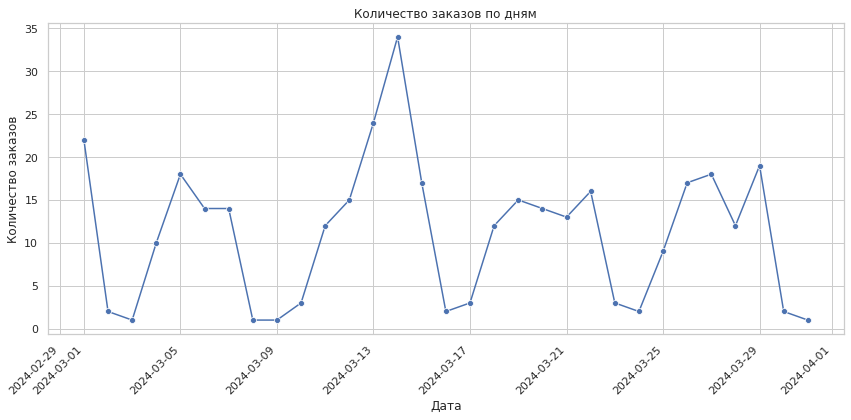

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=orders_by_date, x='date', y='order_count', marker='o')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по дням')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

In [16]:
df_1 = orders_by_date.query('day_of_week == "Monday"')

In [17]:
orders_by_date

,date,order_count,day_of_week
0,2024-03-01,22,Friday
1,2024-03-02,2,Saturday
2,2024-03-03,1,Sunday
3,2024-03-04,10,Monday
4,2024-03-05,18,Tuesday
5,2024-03-06,14,Wednesday
6,2024-03-07,14,Thursday
7,2024-03-08,1,Friday
8,2024-03-09,1,Saturday
9,2024-03-10,3,Sunday


**Как заметно из таблицы выше, в выходные практически нет заказов.**

Необходимо выяснить почему заказы в один из дней резко подскочили, чтобы и дальше увеличивать продажи.

Возможно, в день с наибольшим числом заказов отдел маркетинга запустил какую-то акцию? Или менеджеры стали активнее предлагать компаниям оформить заказ? Нужно подробнее изучить этот день. Начнем со статусов заказа.

In [18]:
orders_status = pd.merge(df_orders, df_order_status,
                       how='left', 
                       on='order_id')
orders_status.head()

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed


In [19]:
orders_status.to_csv('orders_status.csv', index=False)

Посмотрим на количество и соотношение подтвержденных и отмененных заказов.

In [20]:
orders_status_dolya = orders_status[['order_id', 'status']]
orders_status_dolya.status.value_counts()

confirmed    4083
canceled      520
Name: status, dtype: int64

In [21]:
df_dolya = orders_status_dolya.drop_duplicates()
# Подсчитываем количество заказов с каждым статусом
status_counts = df_dolya.status.value_counts()
total_orders = status_counts.sum()
cancelled_orders = status_counts.get('canceled', 0)  # Используем .get() чтобы избежать ошибки, если статуса 'canceled' нет

# Рассчитываем долю отмененных заказов
cancellation_rate = (cancelled_orders / total_orders)

# Округляем до двух знаков после запятой
rounded_cancellation_rate = round(cancellation_rate, 2)

print(f"Доля отмененных заказов: {rounded_cancellation_rate}")

Доля отмененных заказов: 0.11


**Посчитаем количество подтвержденных и отмененных заказов на каждую дату.** Определим в какой день не было ни одного подтвержденного заказа.

In [22]:
orders_status_date = orders_status[['order_id', 'status', 'date']]

In [23]:
# Группировка по дате и статусу, подсчет количества заказов
orders_status_date_group = orders_status.groupby(['date', 'status'])['order_id'].count().reset_index()

orders_status_date_group

,date,status,order_id
0,2024-03-01,canceled,29
1,2024-03-01,confirmed,273
2,2024-03-02,confirmed,30
3,2024-03-03,confirmed,8
4,2024-03-04,confirmed,143
5,2024-03-05,confirmed,222
6,2024-03-06,canceled,12
7,2024-03-06,confirmed,209
8,2024-03-07,canceled,5
9,2024-03-07,confirmed,196


In [24]:
df_pivot = pd.pivot(orders_status_date_group, index='date', columns='status', values='order_id')

In [25]:
df_pivot['canceled'] = df_pivot['canceled'].fillna(0)
df_pivot['confirmed'] = df_pivot['confirmed'].fillna(0)

In [26]:
df_pivot['canceled'] = df_pivot['canceled'].astype(int)
df_pivot['confirmed'] = df_pivot['confirmed'].astype(int)
df_pivot.conf = df_pivot.query('confirmed == 0')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
df_pivot.conf

status,canceled,confirmed
date,,
2024-03-09,18,0


**Пострийм график с заказами по дням в разбивке по статусу заказа.** Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему.

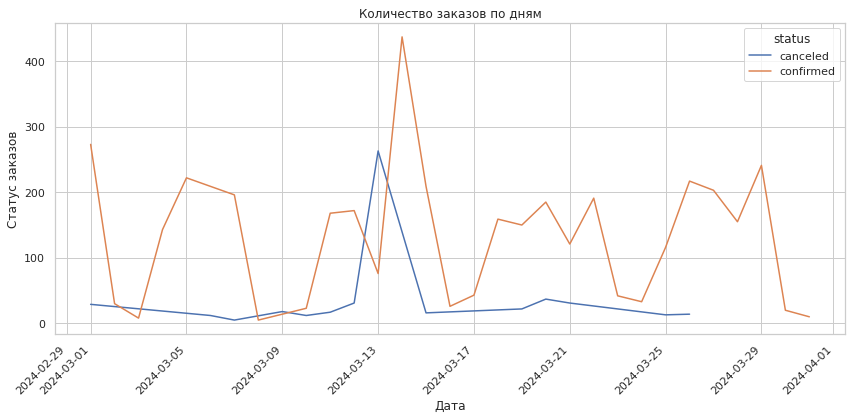

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=orders_status_date_group, x="date", y='order_id', hue='status')
plt.xlabel('Дата')
plt.ylabel('Статус заказов')
plt.title('Количество заказов по дням')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

In [29]:
orders_status_date_group

,date,status,order_id
0,2024-03-01,canceled,29
1,2024-03-01,confirmed,273
2,2024-03-02,confirmed,30
3,2024-03-03,confirmed,8
4,2024-03-04,confirmed,143
5,2024-03-05,confirmed,222
6,2024-03-06,canceled,12
7,2024-03-06,confirmed,209
8,2024-03-07,canceled,5
9,2024-03-07,confirmed,196


**Вывод: В день с наибольшим числом заказов было много успешно оформленных заказов;
       В день, предшествующий дню с наибольшим числом заказов, было много отмен.**

Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему). Проанализируем заказы за эти дни и выберем гипотезу, которую можно назвать наиболее правдоподобной.

- Так сложилось, что один день оказался крайне неудачным для отдела продаж, все клиенты отменили свои заказы. А на следующий день отдел продаж пытался компенсировать отсутствие продаж в предыдущий и перевыполнил дневной план. Почти все заказы не повторяют вчерашние;
- Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние;

Гипотеза №2 выглядит более правдаподобна. Выбираем ее.

In [30]:
orders_status_2 = orders_status.loc[orders_status['date'] == '2024-03-14']
orders_status_2.head(40)

,order_id,product_id,quantity,manager,date,client_id,status
1604,IMND-92004620,1634,20,Владимир Ударников,2024-03-14,38,confirmed
1605,IMND-92004620,259,9,Владимир Ударников,2024-03-14,38,confirmed
1606,IMND-92004620,812,24,Владимир Ударников,2024-03-14,38,confirmed
1607,IMND-92004620,652,10,Владимир Ударников,2024-03-14,38,confirmed
1608,IMND-92004620,516,8,Владимир Ударников,2024-03-14,38,confirmed
1609,IMND-92004620,644,40,Владимир Ударников,2024-03-14,38,confirmed
1610,IMND-92004620,557,32,Владимир Ударников,2024-03-14,38,confirmed
1611,IMND-92004620,588,12,Владимир Ударников,2024-03-14,38,confirmed
1612,IMND-92004620,1502,3,Владимир Ударников,2024-03-14,38,confirmed
1613,IMND-92004620,555,30,Владимир Ударников,2024-03-14,38,confirmed


In [31]:
orders_status_3 = orders_status.loc[orders_status['date'] == '2024-03-13']
orders_status_4 = orders_status_3.loc[orders_status_3['status'] == 'canceled']
orders_status_4.head(40)

,order_id,product_id,quantity,manager,date,client_id,status
3186,NENO-68279828,1634,20,Владимир Ударников,2024-03-13,38,canceled
3187,NENO-68279828,259,9,Владимир Ударников,2024-03-13,38,canceled
3188,NENO-68279828,812,24,Владимир Ударников,2024-03-13,38,canceled
3189,NENO-68279828,652,10,Владимир Ударников,2024-03-13,38,canceled
3190,NENO-68279828,516,8,Владимир Ударников,2024-03-13,38,canceled
3191,NENO-68279828,644,40,Владимир Ударников,2024-03-13,38,canceled
3192,NENO-68279828,557,32,Владимир Ударников,2024-03-13,38,canceled
3193,NENO-68279828,588,12,Владимир Ударников,2024-03-13,38,canceled
3194,NENO-68279828,1502,3,Владимир Ударников,2024-03-13,38,canceled
3195,NENO-68279828,555,30,Владимир Ударников,2024-03-13,38,canceled


### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

In [32]:
df_order_status

,order_id,client_id,status
0,QPLK-54839036,52,confirmed
1,MAQJ-95867467,84,canceled
2,KHLF-51759445,23,confirmed
3,DALF-47566548,97,confirmed
4,BZHU-92977894,29,canceled
...,...,...,...
341,SOCT-63427141,30,confirmed
342,HLDH-41146746,22,confirmed
343,IZFC-94335845,56,confirmed
344,CUDB-19668701,82,confirmed


**У нас есть данные за целый месяц, поэтому пора посчитать ключевые метрики этого месяца.** Однако в  наших данных цена единицы товара указана в долларах США, потому что закупаем их в долларах, но продаем товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), а значит и метрики требуется посчитать в рублях. Хорошо, что у нас есть текстовый файл с курсом доллара США на каждую дату. **Откроем файл `usd_rate.txt`, соберем из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитаем среднее значение курса доллара за месяц.**

In [37]:
try:
    with open('usd_rate.txt', 'r') as file:
        currency_raw = file.readlines()
except FileNotFoundError:
    print("Файл usd_rate.txt не найден.")
    currency_raw = None

if currency_raw:
    df = pd.DataFrame(columns=['raw_data'])
    df['raw_data'] = currency_raw

    # Разделяем строку по первым двум запятым
    df[['date', 'currency_rate', 'currency_name']] = df['raw_data'].str.split(',', n=2, expand=True)

    # Преобразуем дату и курс, удаляем \n из названий валют
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
    df['currency_rate'] = pd.to_numeric(df['currency_rate'], errors='coerce')
    df['currency_name'] = df['currency_name'].str.strip()


    df = df.drop('raw_data', axis=1)  # Удаляем исходную колонку

    print(df)
    print(df.dtypes)
else:
    print("Невозможно создать DataFrame: данные отсутствуют.")

         date  currency_rate currency_name
0  2024-03-01        90.8423    Доллар США
1  2024-03-02        91.3336    Доллар США
2  2024-03-03        91.3336    Доллар США
3  2024-03-04        91.3336    Доллар США
4  2024-03-05        91.3534    Доллар США
5  2024-03-06        91.1604    Доллар США
6  2024-03-07        90.3412    Доллар США
7  2024-03-08        90.7493    Доллар США
8  2024-03-09        90.7493    Доллар США
9  2024-03-10        90.7493    Доллар США
10 2024-03-11        90.7493    Доллар США
11 2024-03-12        90.6252    Доллар США
12 2024-03-13        90.8818    Доллар США
13 2024-03-14        91.5449    Доллар США
14 2024-03-15        91.6359    Доллар США
15 2024-03-16        91.8700    Доллар США
16 2024-03-17        91.8700    Доллар США
17 2024-03-18        91.8700    Доллар США
18 2024-03-19        91.9829    Доллар США
19 2024-03-20        92.2243    Доллар США
20 2024-03-21        92.6861    Доллар США
21 2024-03-22        91.9499    Доллар США
22 2024-03-

In [38]:
df

,date,currency_rate,currency_name
0,2024-03-01,90.8423,Доллар США
1,2024-03-02,91.3336,Доллар США
2,2024-03-03,91.3336,Доллар США
3,2024-03-04,91.3336,Доллар США
4,2024-03-05,91.3534,Доллар США
5,2024-03-06,91.1604,Доллар США
6,2024-03-07,90.3412,Доллар США
7,2024-03-08,90.7493,Доллар США
8,2024-03-09,90.7493,Доллар США
9,2024-03-10,90.7493,Доллар США


In [39]:
df = df.drop(columns=['currency_name'])

In [40]:
df_mean = df.currency_rate.mean()
df_mean_round = round(df_mean, 2)
df_mean_round

91.7

**Работу с ключевыми метриками начнем с подсчета общей выручки.** Данные по товарам в подтвержденных заказах у нас есть в датафрейме `orders_status`, а стоимость одной единицы товара можно взять из датафрейма `df_products`. Объединим эти датафреймы в общий `df_full`, добавим к ним информацию по курсу доллара на каждую дату. Создадим колонку с выручкой для каждого товара в заказах и посчитаем, **чему равна общая выручка в рублях?** Учитываем только подтвержденные заказы. 

In [41]:
df_full = pd.merge(orders_status, df_products, how='left', left_on ='product_id', right_on='id')
df_full_rate = pd.merge(df_full, df, how='left', on='date')

In [42]:
df_full_rate['price_rub'] = df_full_rate['price'] * df_full_rate['currency_rate']

In [43]:
df_full_rate['revenue'] = df_full_rate['price_rub'] * df_full_rate['quantity']

In [44]:
df_confirmed = df_full_rate.query('status == "confirmed"')

In [45]:
df_full_rate

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон
...,...,...,...,...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed,812,"Klipsch, Cinema 400",246.34,Саундбар
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed,145,"Dali, Oberon 7 C",1640.45,Напольная акустика
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed,194,"Dali, Oberon Vokal",462.20,Центральный канал
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed,1086,"Pioneer, Elite VSX-LX503",879.52,AV-ресивер


In [46]:
df_confirmed_sum = df_confirmed.revenue.sum()
df_confirmed_sum

2038231821.564864

In [47]:
df_confirmed_sum_round = round(df_confirmed_sum, 2)
df_confirmed_sum_round

2038231821.56

In [51]:
df_full_rate

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed,812,"Klipsch, Cinema 400",246.34,Саундбар,92.7761,22854.464474,5.485071e+05
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed,145,"Dali, Oberon 7 C",1640.45,Напольная акустика,92.7761,152194.553245,1.369751e+06
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed,194,"Dali, Oberon Vokal",462.20,Центральный канал,92.7761,42881.113420,2.572867e+05
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed,1086,"Pioneer, Elite VSX-LX503",879.52,AV-ресивер,92.7761,81598.435472,2.447953e+05


**Следующая метрика, которую нам нужно посчитать — средний чек в этом месяце (в рублях).** Разделим общую выручку на количество заказов.

In [52]:
(df_confirmed['revenue'].sum() / df_confirmed['order_id'].nunique()).round(2)

6596219.49

In [53]:
df_report_by_date = df_confirmed.groupby('date').agg(orders=('order_id', 'nunique'), revenue=('revenue', 'sum')).reset_index()

In [54]:
df_report_by_date['average_check'] = (df_report_by_date['revenue'] / df_report_by_date['orders']).round(2)

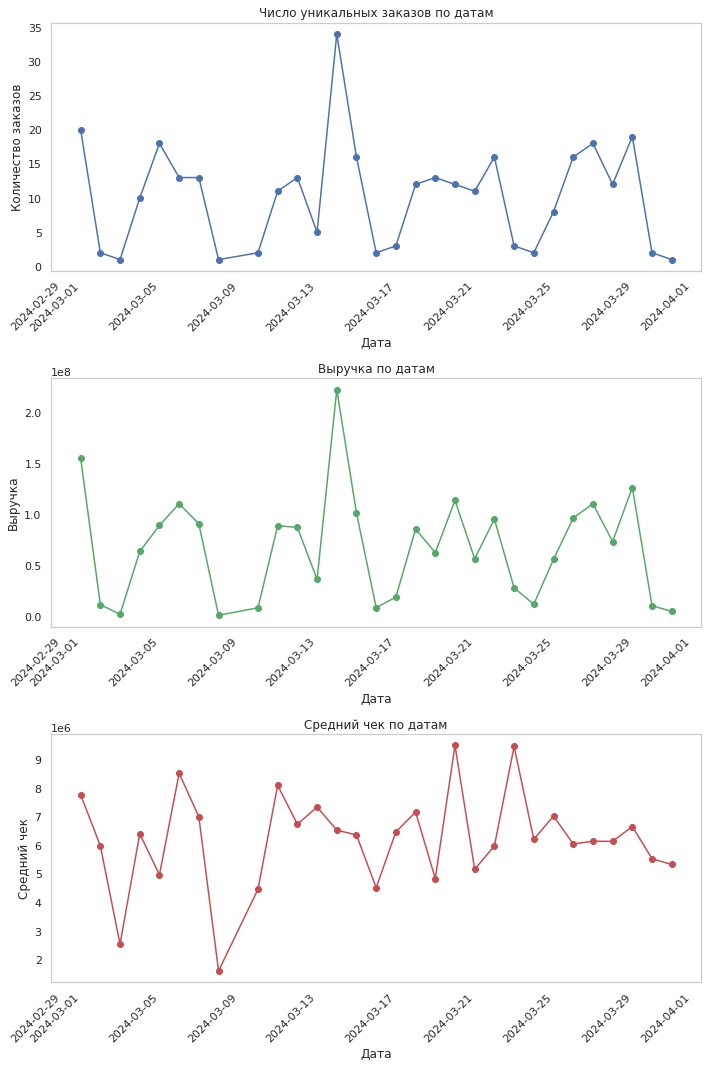

In [55]:
plt.figure(figsize=(10,15))

plt.subplot(3, 1, 1)
plt.plot(df_report_by_date['date'], df_report_by_date['orders'], marker='o', color='b')
plt.title('Число уникальных заказов по датам')
plt.xlabel('Дата')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Количество заказов')
plt.grid()
plt.tight_layout() 


plt.subplot(3, 1, 2)
plt.plot(df_report_by_date['date'], df_report_by_date['revenue'], marker='o', color='g')
plt.title('Выручка по датам')
plt.xlabel('Дата')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Выручка')
plt.grid()
plt.tight_layout() 


plt.subplot(3, 1, 3)
plt.plot(df_report_by_date['date'], df_report_by_date['average_check'], marker='o', color='r')
plt.title('Средний чек по датам')
plt.xlabel('Дата')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Средний чек')
plt.grid()
plt.tight_layout() 


**Ключевые метрики месяца мы посчитали, теперь попробуем посмотреть на их динамику внутри месяца: посчитаем выручку, средний чек и число заказов — на каждый день. Посмотрим на графики и сделаем выводы.**

In [57]:
df_report_by_date = df_confirmed.groupby(['date'], as_index=False)\
                                    .aggregate({'order_id': 'nunique', 'revenue': 'sum'})\
                                    .rename(columns={'order_id':'orders'})

In [58]:
df_report_by_date['avg_check'] = (df_report_by_date['revenue'] / df_report_by_date['orders']).round(2)
df_report_by_date

,date,orders,revenue,avg_check
0,2024-03-01,20,1.554118e+08,7770587.80
1,2024-03-02,2,1.197167e+07,5985834.26
2,2024-03-03,1,2.548418e+06,2548418.42
3,2024-03-04,10,6.404993e+07,6404992.56
4,2024-03-05,18,8.952724e+07,4973735.46
5,2024-03-06,13,1.107687e+08,8520669.46
6,2024-03-07,13,9.102331e+07,7001792.83
7,2024-03-08,1,1.609147e+06,1609146.62
8,2024-03-10,2,8.929309e+06,4464654.57
9,2024-03-11,11,8.910847e+07,8100769.59


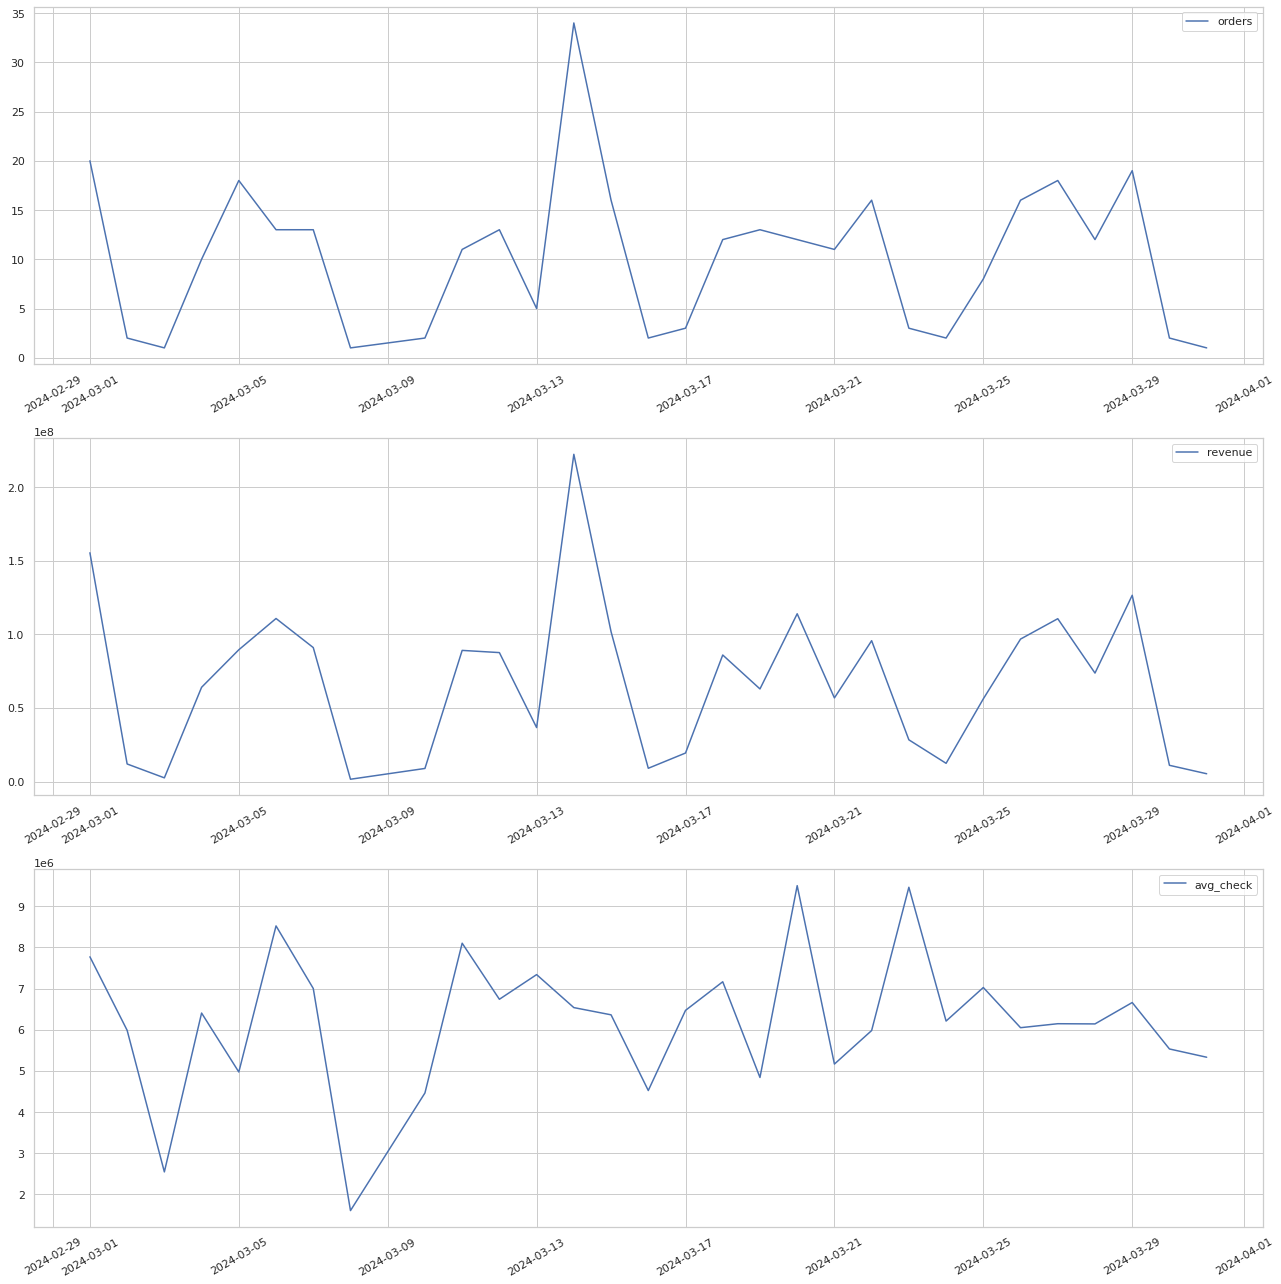

In [59]:
metrics = ['orders', 'revenue', 'avg_check']

fig, axes = plt.subplots(3, 1, figsize=(18, 18))

for i, metric in enumerate(metrics):
    df = df_report_by_date[['date', metric]].set_index('date')
    sns.lineplot(data=df, ax=axes[i]);
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].set_xlabel('')

plt.tight_layout();

Выводы:
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла);
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла);
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение;
- с течением времени выручка то увеличивается, то уменьшается;
- на протяжении всего месяца средний чек то увеличивается, то уменьшается.

### Проанализируем интерес клиентов к брендам

Нужно разобраться какие бренды востребованы среди клиентов, а какие — нет. На основе данных о названиях товаров в датафрейме `df_full` создадим новую колонку `brand`, где будет только название бренда. **Посчитаем, сколькими брендами интересовались клиенты.**

In [61]:
df_full['brand'] = df_full['name'].str.split(',').apply(lambda x: x[0])

In [62]:
df_full['brand'].head()

0    Heco
1     JBL
2     KEF
3    Heco
4    Rode
Name: brand, dtype: object

In [63]:
df_full.brand.nunique()

121

## Шаг 16

Посчитаем какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определим какой бренд принес наибольшую выручку.** 

In [67]:
df_confirmed_brand = df_confirmed.query("status == 'confirmed'")\
                .groupby(['brand'], as_index=False)\
                .aggregate({ 'revenue': 'sum', 'order_id': 'nunique'})\
                .rename(columns={'order_id':'orders'})\
                .sort_values('revenue', ascending=False)
df_confirmed_brand

,brand,revenue,orders
46,JBL,2.665961e+08,264
43,Heco,2.388163e+08,229
53,Klipsch,2.039024e+08,205
120,Yamaha,1.658651e+08,218
49,KEF,1.465101e+08,73
...,...,...,...
8,AudioSource,3.388167e+04,1
40,Fosi Audio,3.129419e+04,1
1,ART,2.670040e+04,2
18,Bravo Audio,2.405086e+04,1


In [68]:
df_confirmed_brand.sort_values('orders', ascending=False).head(1)

,brand,revenue,orders
46,JBL,2.665961e+08,264


**Ответ: JBL.**

У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых вашей компанией. **Нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

Начнем с того, что определим, какие товары из имеющихся в продаже хоть раз заказывали, а какие — нет. Для этого соберем список из перечня уникальных идентификаторов товаров, которые встречаются в датафрейме `df_confirmed`. После этого для каждого товара в датафрейме `df_products` определим, был ли этот товар в списке заказанных товаров в этом месяце или нет: создадим новую колонку `is_in_orders` и заполним её соответственно значениями `yes` или `no` для каждого товара.

In [69]:
products_in_orders = []

for i in df_confirmed.product_id:
    if i in df_products.id and i not in products_in_orders:
        products_in_orders.append(i)

In [70]:
df_products['is_in_orders'] = 0

In [71]:
def check_in_orders(product_id):
    return 'yes' if product_id in products_in_orders else 'no'

df_products['is_in_orders'] = df_products['id'].apply(check_in_orders)


In [72]:
df_products.is_in_orders.value_counts()

yes    1180
no      497
Name: is_in_orders, dtype: int64

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определим у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берем в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

Отметим бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда: 
- AKG  
- ASUS	
- Dali  
- Emotiva  
- KEF  
- Marantz  
- Onkyo  
- Pioneer  
- Yaqin

In [73]:
df_products['brand'] = df_confirmed['name'].str.split(',').str.get(0)

In [74]:
products_by_brand_and_orders = df_products.groupby(['brand', 'is_in_orders'])['id'].nunique().reset_index(name='products')

In [77]:
# создадим колонку brand
df_products['brand'] = df_products['name'].str.split(',').str[0]

# группируем
products_by_brand_and_orders = df_products.groupby(['brand', 'is_in_orders'])['id'].nunique().reset_index(name='products')

# создаем сводные таблицы
df_pivot_products = products_by_brand_and_orders.pivot(index='brand', columns='is_in_orders', values='products')

# заполняем пропуски нулями
df_pivot_products = df_pivot_products.fillna(0)

# сбрасывааем индексы
df_pivot_products = df_pivot_products.reset_index()

# считаем общее число товаров
df_pivot_products['total'] = df_pivot_products['yes'] + df_pivot_products['no']

# подсчет доли не заказанных товаров
df_pivot_products['never_ordered_share'] = df_pivot_products['no'] / df_pivot_products['total']

# отбираем бренды
filtered_brands = df_pivot_products[(df_pivot_products['total'] > 15) & (df_pivot_products['never_ordered_share'] > 0.5)]

# выводим отфильтрованные бренды
print(filtered_brands)



is_in_orders    brand    no   yes  total  never_ordered_share
32               Dali  49.0  18.0   67.0             0.731343
60                KEF  54.0  28.0   82.0             0.658537
77            Marantz  19.0   3.0   22.0             0.863636
94            Pioneer  70.0  33.0  103.0             0.679612


### Составим отчет по продажам менеджеров

Чтобы компания знала, кого из менеджеров отдела продаж премировать, а с кем провести беседу по итогам месяца, **нам необходимо сделать отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитаем значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.** Посчитаем данные и визуализируем результат, чтобы принимать решение о поощрении или проведении беседы с менеджерами было удобнее.

In [79]:
df_managers = df_confirmed.groupby(['manager'], as_index=False)\
                        .aggregate({'revenue': 'sum', 'order_id': 'nunique'})\
                        .rename(columns={'order_id':'orders'})\
                        .sort_values('revenue', ascending=False)
df_managers

,manager,revenue,orders
9,Маргарита Камертонова,3.473886e+08,48
4,Виктор Тромбонов,3.188999e+08,50
8,Максим Барабанов,2.401478e+08,40
5,Владимир Ударников,2.084865e+08,31
0,Алексей Саксофонов,1.953435e+08,27
7,Ксения Балалайкина,1.817621e+08,27
6,Екатерина Тарелкина,1.781576e+08,28
10,Надежда Гармошкина,1.347836e+08,21
1,Анастасия Дудкина,1.234504e+08,20
2,Антон Скрипкин,5.150268e+07,7


In [80]:
df_managers['%revenue'] = round(df_managers['revenue'] / df_managers['revenue'].sum() * 100, 2)
df_managers['%orders'] = round(df_managers['orders'] / df_managers['orders'].sum() * 100, 2)
df_managers

,manager,revenue,orders,%revenue,%orders
9,Маргарита Камертонова,3.473886e+08,48,17.04,15.53
4,Виктор Тромбонов,3.188999e+08,50,15.65,16.18
8,Максим Барабанов,2.401478e+08,40,11.78,12.94
5,Владимир Ударников,2.084865e+08,31,10.23,10.03
0,Алексей Саксофонов,1.953435e+08,27,9.58,8.74
7,Ксения Балалайкина,1.817621e+08,27,8.92,8.74
6,Екатерина Тарелкина,1.781576e+08,28,8.74,9.06
10,Надежда Гармошкина,1.347836e+08,21,6.61,6.80
1,Анастасия Дудкина,1.234504e+08,20,6.06,6.47
2,Антон Скрипкин,5.150268e+07,7,2.53,2.27


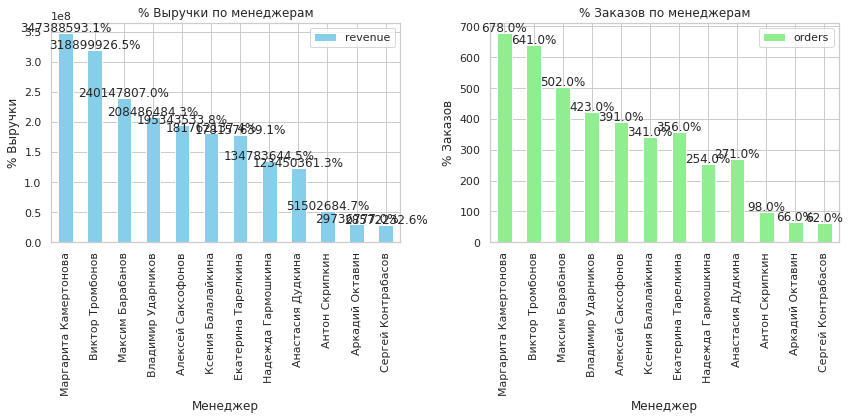

                       orders       revenue  sum_revenue  sum_orders
manager                                                             
Маргарита Камертонова     678  3.473886e+08        17.04       16.61
Виктор Тромбонов          641  3.188999e+08        15.65       15.70
Максим Барабанов          502  2.401478e+08        11.78       12.29
Владимир Ударников        423  2.084865e+08        10.23       10.36
Алексей Саксофонов        391  1.953435e+08         9.58        9.58
Ксения Балалайкина        341  1.817621e+08         8.92        8.35
Екатерина Тарелкина       356  1.781576e+08         8.74        8.72
Надежда Гармошкина        254  1.347836e+08         6.61        6.22
Анастасия Дудкина         271  1.234504e+08         6.06        6.64
Антон Скрипкин             98  5.150268e+07         2.53        2.40
Аркадий Октавин            66  2.973678e+07         1.46        1.62
Сергей Контрабасов         62  2.857223e+07         1.40        1.52


In [83]:
# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График % выручки
df_confirmed_orders_men_sorted.plot(kind='bar', y='revenue', ax=axes[0], color='skyblue')
axes[0].set_title('% Выручки по менеджерам')
axes[0].set_ylabel('% Выручки')
axes[0].set_xlabel('Менеджер')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# График % заказов
df_confirmed_orders_men_sorted.plot(kind='bar', y='orders', ax=axes[1], color='lightgreen')
axes[1].set_title('% Заказов по менеджерам')
axes[1].set_ylabel('% Заказов')
axes[1].set_xlabel('Менеджер')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


print(df_confirmed_orders_men_sorted)

- лучшим менеджером по % выручки стала Маргарита Камертонова;
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных;
- лидер по % заказов реализовал более 16% заказов;
- наихудшие показатели у Сергея Контрабасова;
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина.

## Итоги

В проекте мы проанализировали продажи музыкальных товаров: собрали данные, посчитали ключевые метрики в динамике; определили дни, которые выбиваются из общей картины, и выяснили причину этого; нашли наиболее прибыльные бренды и те, которые зря занимают место на виртуальной «полке».